In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
try:
    os.chdir(os.path.join(os.getcwd(), 'resources/Outliers'))
    print(os.getcwd())
except:
    pass

/Users/matthewbeyer/Documents (non-sync)/coursework/python-data-analysis-course/resources/Outliers


In [10]:
d1 = np.loadtxt("outlier_1d.txt")
d2 = np.loadtxt("outlier_2d.txt")
d3 = np.loadtxt("outlier_curve.txt")

In [11]:
print(d1.shape, d2.shape)

(1010,) (1010, 2)


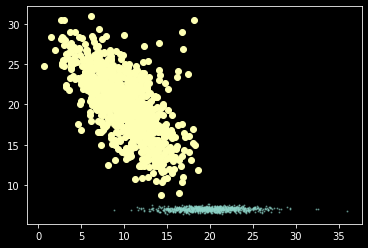

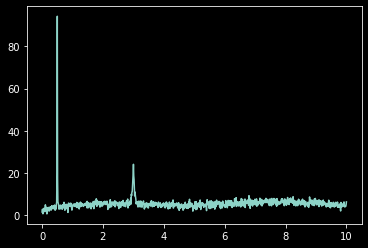

In [17]:
plt.scatter(d1, np.random.normal(7,0.2, size=d1.size), s=1, alpha=0.5) # for the 1d dataset, this just gives it some random scattering to show the data more clearly
plt.scatter(d2[:,0], d2[:,1]) # this is a dataset which has been contaminated with some outliers
plt.show();
plt.plot(d3[:,0], d3[:,1]); # this is some emission plot

In [19]:
# common way of pruning outliers:
# 1. model data as some analytic distribution
# 2. find points below a certain probability
# 3. remove them
# 4. possibly repeat
# ---> note that personally I dunno if this is really right... but these are just the notes he gives
# my issues are:
# 1. if you already know the analytic distribution then you don't need to be bothering trying to figure it out
# 2. this is starting with an a priori conclusion then going backwards to fit the data

In [21]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1-mean) / std) # z_score is measure of how many std deviations from the mean you are
threshold = 3
good = z_score < threshold

In [22]:
print(f"rejection {(~good).sum} points")

rejection <built-in method sum of numpy.ndarray object at 0x11f976f30> points


In [23]:
from scipy.stats import norm

In [24]:
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")

z-score of 3 corresponds to a prob of 0.27%


In [25]:
visual_scatter = np.random.normal(size=d1.size)

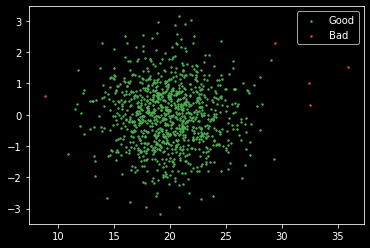

In [29]:
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=2, label="Bad", color="#F44336")
plt.legend()

In [34]:
threshold = 1
good = z_score < threshold

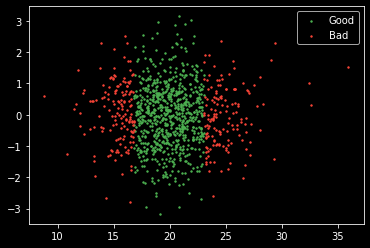

In [35]:
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=2, label="Bad", color="#F44336")
plt.legend()

In [36]:
# 2 dimensional case

In [37]:
from scipy.stats import multivariate_normal as mn

In [38]:
mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > 0.01 / 100

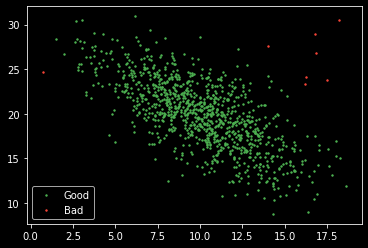

In [39]:
plt.scatter(d2[good, 0], d2[good,1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label="Bad", color="#F44336")
plt.legend()

In [40]:
# good threshold is greater than probability of 0.01 percent in previous plot given the analytic representation

In [41]:
mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > 1 / 100

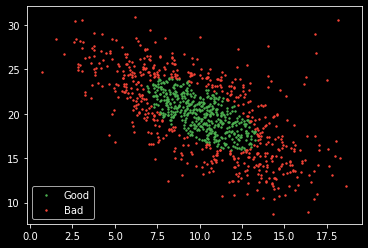

In [42]:
plt.scatter(d2[good, 0], d2[good,1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label="Bad", color="#F44336")
plt.legend()

In [43]:
# above is for 1%... basically covariance matrix makes an elipse

In [44]:
mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > .01 / 100

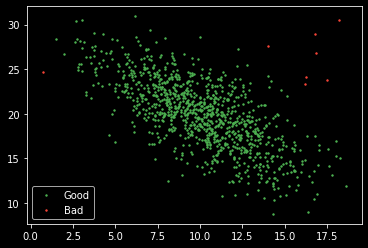

In [45]:
plt.scatter(d2[good, 0], d2[good,1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label="Bad", color="#F44336")
plt.legend()

In [46]:
# back to normal

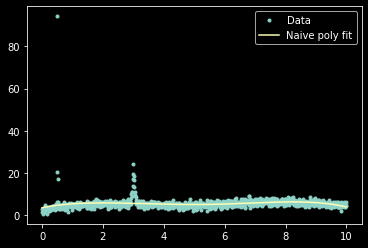

In [48]:
# naive method to fit the 1d data previously shown
xs, ys = d3.T
p = np.polyfit(xs, ys, deg=5)
ps = np.polyval(p,xs)
plt.plot
plt.plot(xs, ys, ".", label="Data")
plt.plot(xs, ps, label="Naive poly fit")
plt.legend()

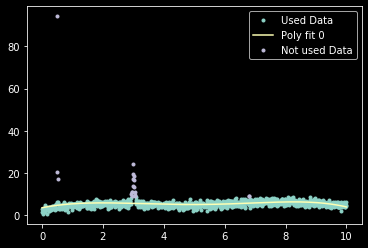

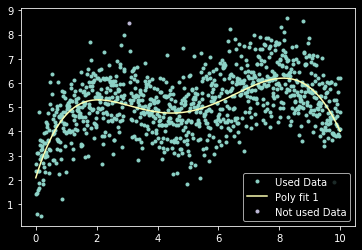

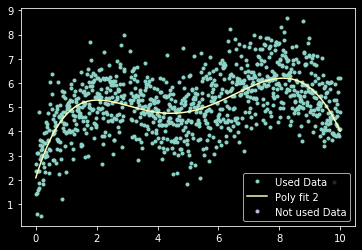

In [49]:
# approach to screen those points it to screen points outside of a certain threshold and recalculate threhold iteratively until there are no bad points left
# once again i disagree with this, it's basically equivilant to just picking and choosing which values you don't like, but putting enough layers of abstraction that it doesn't seem like you're doing that
x, y = xs.copy(), ys.copy()
for i in range(5):
    p = np.polyfit(x,y,deg=5)
    ps = np.polyval(p,x)
    good = y-ps < 3

    x_bad, y_bad = x[~good], y[~good]
    x,y =x[good], y[good]

    plt.plot(x,y, ".", label = "Used Data")
    plt.plot(x, np.polyval(p,x), label = f"Poly fit {i}")
    plt.plot(x_bad,y_bad, ".", label = "Not used Data")
    plt.legend()
    plt.show()

    if (~good).sum() ==0:
        break
    

In [50]:
# I can't deny that it produces some nice resulst though :)

In [51]:
# sklearn has some machine learning algorithms that autoscreen outlier data

In [52]:
# example

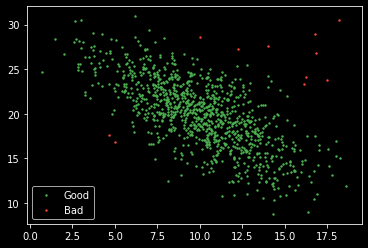

In [54]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01) # n_neighbors is how many nearest neighbors it uses for outlier detection, contamination is how many data points are expected as outliers
good = lof.fit_predict(d2) == 1 # lof returns the array of if it thinks the data point is real or an outlier
plt.scatter(d2[good, 0], d2[good,1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label="Bad", color="#F44336")
plt.legend()

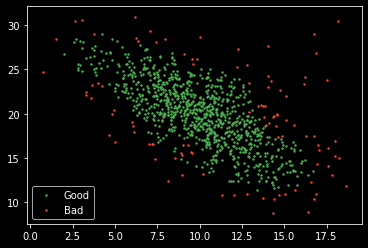

In [55]:
#here's example of different contamination rate

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # n_neighbors is how many nearest neighbors it uses for outlier detection, contamination is how many data points are expected as outliers
good = lof.fit_predict(d2) == 1 # lof returns the array of if it thinks the data point is real or an outlier
plt.scatter(d2[good, 0], d2[good,1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label="Bad", color="#F44336")
plt.legend()

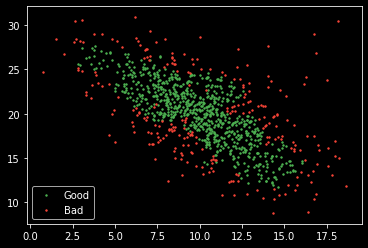

In [56]:
#here's example of different contamination rate

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.25) # n_neighbors is how many nearest neighbors it uses for outlier detection, contamination is how many data points are expected as outliers
good = lof.fit_predict(d2) == 1 # lof returns the array of if it thinks the data point is real or an outlier
plt.scatter(d2[good, 0], d2[good,1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label="Bad", color="#F44336")
plt.legend()

In [57]:
# note that it doesn't work in perfect elipse since it's not using a covariance matrix it's essentially using the density